In [1]:
#Adaboost Classifier


In [2]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets


In [3]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [4]:
# Create adaboost-decision tree classifer object
clf = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         random_state=0)


In [5]:
# Train model
model = clf.fit(X, y)


In [6]:
#Decision Tree Classifier


In [2]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets


In [3]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [4]:
# Create decision tree classifer object using gini
clf = DecisionTreeClassifier(criterion='gini', random_state=0)


In [5]:
# Train model
model = clf.fit(X, y)


In [6]:
# Make new observation
observation = [[ 5,  4,  3,  2]]


In [7]:
# Predict observation's class    
model.predict(observation)


array([1])

In [8]:
# View predicted class probabilities for the three classes
model.predict_proba(observation)


array([[0., 1., 0.]])

In [9]:
#decison tree regression

In [10]:
# Load libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets


In [11]:
# Load data with only two features
boston = datasets.load_boston()
X = boston.data[:,0:2]
y = boston.target


In [12]:
# Create decision tree classifer object
regr = DecisionTreeRegressor(random_state=0)


In [13]:
# Train model
model = regr.fit(X, y)


In [14]:
# Make new observation
observation = [[0.02, 16]]
              
# Predict observation's value  
model.predict(observation)

array([33.])

In [16]:
#Feature Importance


In [17]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


In [18]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [19]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(X, y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
# Calculate feature importances
importances = model.feature_importances_


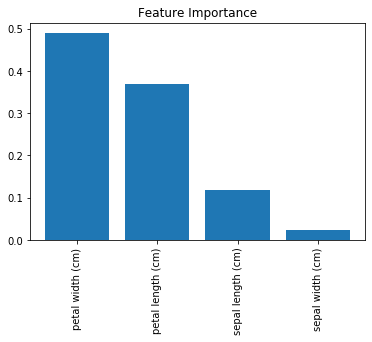

In [21]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()


In [22]:
indices

array([3, 2, 0, 1], dtype=int64)

In [23]:
names


['petal width (cm)',
 'petal length (cm)',
 'sepal length (cm)',
 'sepal width (cm)']

In [24]:
#Feature Selection Using Random Forest


In [25]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


In [26]:
# Load the iris dataset
iris = datasets.load_iris()

# Create a list of feature names
feat_labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']

# Create X from the features
X = iris.data

# Create y from output
y = iris.target


In [27]:
# View the features
X[0:5]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [28]:
# View the target data
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [30]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)


('Sepal Length', 0.11024282328064558)
('Sepal Width', 0.016255033655398383)
('Petal Length', 0.45028123999239505)
('Petal Width', 0.42322090307156096)


In [31]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
     

In [32]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])


Petal Length
Petal Width


In [33]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)


In [34]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)


0.9333333333333333

In [36]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)


0.9

In [37]:
#Handle Imbalanced Classes In Random Forest


In [38]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import datasets


In [39]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [40]:
# Make class highly imbalanced by removing first 40 observations
X = X[40:,:]
y = y[40:]

# Create target vector indicating if class 0, otherwise 1
y = np.where((y == 0), 0, 1)


In [41]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

# Train model
model = clf.fit(X, y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
#Random Forest Classifier


In [43]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets


In [44]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [45]:
# Create random forest classifer object that uses entropy
clf = RandomForestClassifier(criterion='entropy', random_state=0, n_jobs=-1)


In [46]:
# Train model
model = clf.fit(X, y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
# Make new observation
observation = [[ 5,  4,  3,  2]]
              
# Predict observation's class    
model.predict(observation)


array([1])

In [48]:
#Random Forest Classifier Example


In [2]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

# Set random seed
np.random.seed(0)


In [3]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [6]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]


In [7]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))


Number of observations in the training data: 118
Number of observations in the test data: 32


In [8]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [9]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

# View target
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [10]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [11]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [13]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [14]:
# Create actual english names for the plants for each predicted plant class
preds = iris.target_names[clf.predict(test[features])]


In [15]:
# View the PREDICTED species for the first five observations
preds[0:5]


array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [16]:
# View the ACTUAL species for the first five observations
test['species'].head()


7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [17]:
# Create confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])


Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [18]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))


[('sepal length (cm)', 0.11185992930506346),
 ('sepal width (cm)', 0.016341813006098178),
 ('petal length (cm)', 0.36439533040889194),
 ('petal width (cm)', 0.5074029272799464)]

In [1]:
#Random Forest Regression


In [2]:
# Load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets


In [3]:
# Load data with only two features
boston = datasets.load_boston()
X = boston.data[:,0:2]
y = boston.target


In [4]:
# Create decision tree classifer object
regr = RandomForestRegressor(random_state=0, n_jobs=-1)


In [5]:
# Train model
model = regr.fit(X, y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [6]:
#Select Important Features In Random Forest


In [7]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel


In [8]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [9]:
# Create random forest classifier
clf = RandomForestClassifier(random_state=0, n_jobs=-1)


In [10]:
# Create object that selects features with importance greater than or equal to a threshold
selector = SelectFromModel(clf, threshold=0.3)

# Feature new feature matrix using selector
X_important = selector.fit_transform(X, y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
# View first five observations of the features
X_important[0:5]


array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [12]:
# Train random forest using most important featres
model = clf.fit(X_important, y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
